# Bezpieczeństwo - Projekt: Hashowanie z wykorzystaniem drzewa BST

Poniżej znajdują się testy implementacji Hashowania z drzewem BST.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importy lokalnych modułów
from BST import HashTable as HashTableBST
from AVL import HashTable as HashTableAVL

from Benchmark import calibration_benchmark
from Benchmark import performance_benchmark
from Benchmark import benchmark_builtin_structures
from Generators import generate_keys

In [4]:
# Parametry
test_size = 10000
table_cls = 100
scenarios = ['Posortowana', 'Posortowana szum', 'Losowa unikalna', 'Losowa', 'Powtarzajaca']

In [5]:
calibration = calibration_benchmark()
print(f"Pomiar kalibracyjny trwał: {calibration} s")

Pomiar kalibracyjny trwał: 0.005295399998431094 s


In [6]:
# Generowanie wartości
keys = {}
for scenario in scenarios:
    keys[scenario] = generate_keys(test_size, scenario)

sample_values = pd.DataFrame({ s: keys[s][10:20] for s in scenarios })
sample_values

,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
0,10,5,4303,13657,698
1,11,9,5077,61023,973
2,12,9,9424,91939,665
3,13,12,4504,61212,623
4,14,17,7848,88932,740
5,15,19,7652,67265,539
6,16,16,3415,79272,660
7,17,19,4321,85,104
8,18,15,7835,64124,446
9,19,17,7490,17521,658


In [7]:
structures = ['BST', 'AVL', 'List', 'Dict']

results_insert = pd.DataFrame({'Struktura': structures}).set_index('Struktura')
results_insert_normalized = pd.DataFrame({'Struktura': structures}).set_index('Struktura')
results_search = pd.DataFrame({'Struktura': structures}).set_index('Struktura')
results_search_normalized = pd.DataFrame({'Struktura': structures}).set_index('Struktura')

for scenario in scenarios:
    bst_ins, bst_srch = performance_benchmark(HashTableBST, table_cls, keys[scenario])

    bst_ins, bst_srch = performance_benchmark(HashTableBST, table_cls, keys[scenario])
    avl_ins, avl_srch = performance_benchmark(HashTableAVL, table_cls, keys[scenario])
    list_perf, dict_perf = benchmark_builtin_structures(keys[scenario])

    results_insert[f"{scenario}"]            = [bst_ins, avl_ins, list_perf[0], dict_perf[0]]
    results_insert_normalized[f"{scenario}"] = [bst_ins / calibration,
                                                avl_ins/ calibration,
                                                list_perf[0] / calibration, 
                                                dict_perf[0] / calibration]

    results_search[f"{scenario}"]             = [bst_srch, avl_srch, list_perf[1], dict_perf[1]]
    results_search_normalized [f"{scenario}"] = [bst_srch / calibration,
                                                 avl_srch / calibration,
                                                 list_perf[1] / calibration,
                                                 dict_perf[1] / calibration]

In [8]:
print("Rezultaty - Dodawanie(s)")
results_insert

Rezultaty - Dodawanie(s)


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,0.066082,0.038283,0.012270,0.015731,0.004673
AVL,0.096538,0.037735,0.047739,0.131729,0.014707
List,0.000836,0.000742,0.001455,0.000889,0.001159
Dict,0.000575,0.000635,0.000683,0.000798,0.000474


In [9]:
print("Rezultaty - Dodawanie (znormalizowane)")
results_insert_normalized

Rezultaty - Dodawanie (znormalizowane)


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,12.479095,7.229520,2.317087,2.970673,0.882558
AVL,18.230615,7.126015,9.015183,24.876138,2.777392
List,0.157873,0.140027,0.274842,0.167900,0.218888
Dict,0.108509,0.119821,0.128904,0.150678,0.089606


In [10]:
print("Rezultaty - Wyszukiwanie (s)")
results_search

Rezultaty - Wyszukiwanie (s)


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,0.057548,0.033203,0.010270,0.014302,0.004224
AVL,0.006008,0.006279,0.009115,0.010036,0.004263
List,1.267246,1.302170,1.671855,1.373033,0.282286
Dict,0.000417,0.000362,0.000332,0.000419,0.000554


In [11]:
print("Rezultaty - Wyszukiwanie (znormalizowane) ")
results_search_normalized

Rezultaty - Wyszukiwanie (znormalizowane) 


,Posortowana,Posortowana szum,Losowa unikalna,Losowa,Powtarzajaca
Struktura,,,,,
BST,10.867583,6.270253,1.939457,2.700872,0.797711
AVL,1.134551,1.185822,1.721343,1.895154,0.805076
List,239.310685,245.905900,315.718303,259.287854,53.307739
Dict,0.078785,0.068305,0.062715,0.079125,0.104714


In [12]:
def plot_structures_comparison(df: pd.DataFrame, title: str = 'Porównanie struktur danych w różnych scenariuszach'):
    """
    Rysuje grupowany wykres słupkowy porównujący czasy różnych struktur danych
    w różnych scenariuszach.
    
    Parametry:
    - df: DataFrame z indeksem jako nazwy struktur i kolumnami jako scenariusze,
          wartości to czasy (np. w ms).
    - title: Tytuł wykresu.
    """
    scenarios = df.columns
    structures = df.index
    x = np.arange(len(scenarios))
    width = 0.8 / len(structures)

    plt.figure()
    for i, struktura in enumerate(structures):
        plt.bar(x + i*width, df.loc[struktura], width, label=struktura)
    
    plt.xticks(x + width*(len(structures)-1)/2, scenarios, rotation=45, ha='right')
    plt.xlabel('Scenariusz')
    plt.ylabel('Czas [s]')
    plt.title(title)
    plt.legend(title='Struktura')
    plt.tight_layout()
    plt.show()

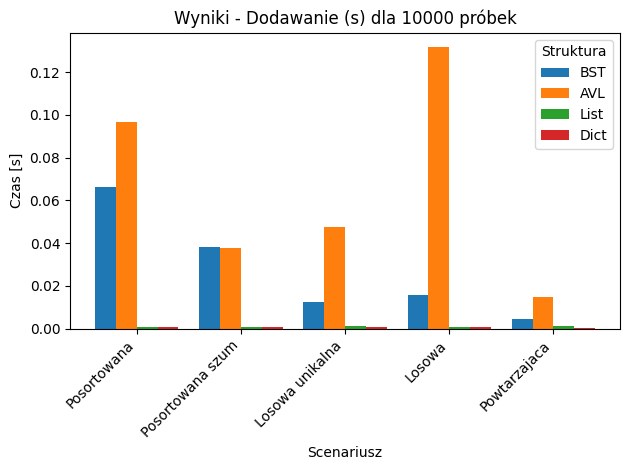

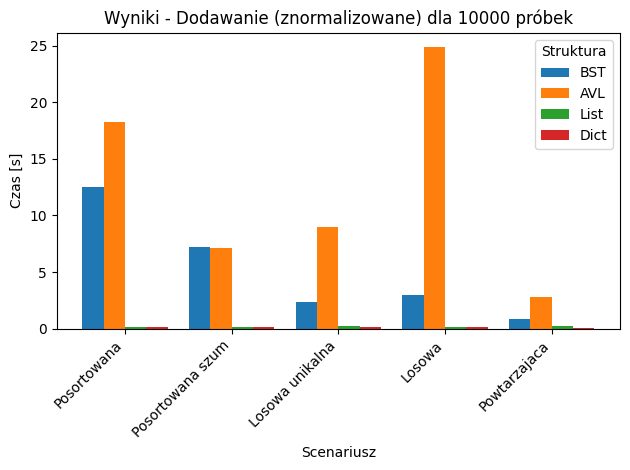

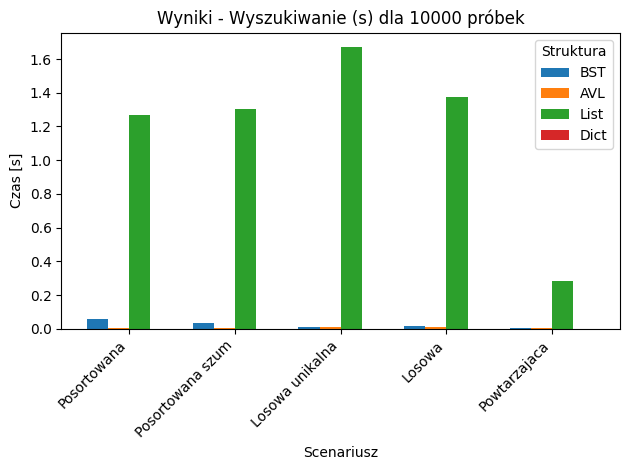

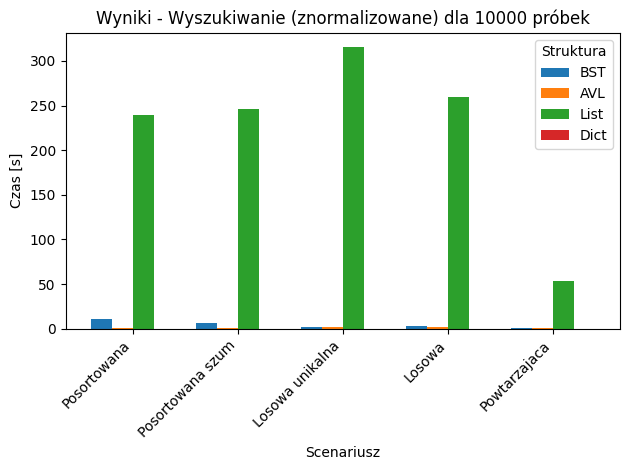

In [13]:

plot_structures_comparison(results_insert, title = f'Wyniki - Dodawanie (s) dla {test_size} próbek')
plot_structures_comparison(results_insert_normalized, title = f'Wyniki - Dodawanie (znormalizowane) dla {test_size} próbek')
plot_structures_comparison(results_search, title = f'Wyniki - Wyszukiwanie (s) dla {test_size} próbek')
plot_structures_comparison(results_search_normalized, title = f'Wyniki - Wyszukiwanie (znormalizowane) dla {test_size} próbek')


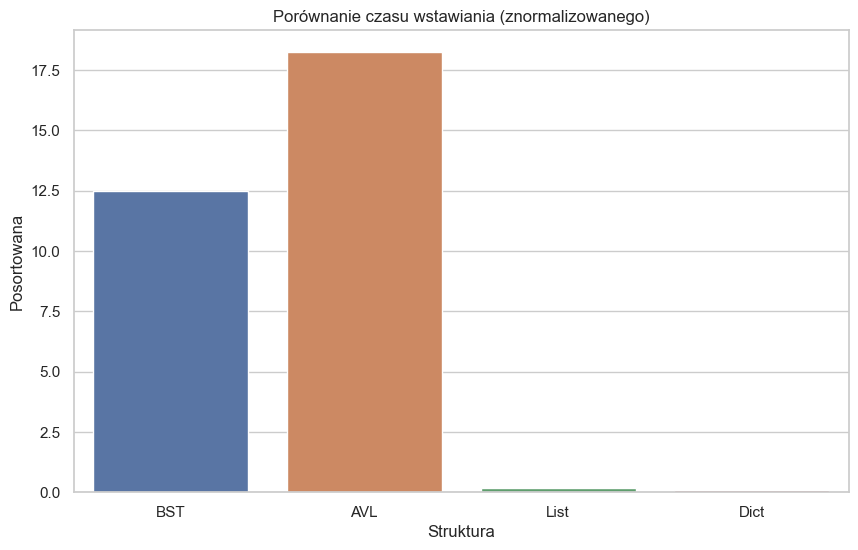

In [ ]:
# Wykresy
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=results_insert_normalized, x="Struktura", y="Posortowana", hue="Struktura", ax=ax)
ax.set_title("Porównanie czasu wstawiania (znormalizowanego)")
plt.show()

Scenario: Posortowana : bst_mem: 0.0078125, avl_mem: 0.0
Scenario: Posortowana szum : bst_mem: 0.0, avl_mem: 0.0
Scenario: Losowa unikalna : bst_mem: 0.0, avl_mem: 0.0
Scenario: Losowa : bst_mem: 0.0, avl_mem: 0.0
Scenario: Powtarzajaca : bst_mem: 0.0, avl_mem: 0.00390625
